In [ ]:
# Import necessary modules from TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset - 60,000 training and 10,000 test images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values from [0, 255] to [0, 1] for better training stability
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [ ]:
# Convert class labels (0-9) into one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define a basic neural network model using Keras Sequential API
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),                        # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')                      # Output layer with 10 neurons (for 10 digit classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model for 5 epochs with a batch size of 32 and 10% validation split
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8710 - loss: 0.4524 - val_accuracy: 0.9698 - val_loss: 0.1058
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1126 - val_accuracy: 0.9738 - val_loss: 0.0902
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9778 - loss: 0.0722 - val_accuracy: 0.9762 - val_loss: 0.0823
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9832 - loss: 0.0509 - val_accuracy: 0.9760 - val_loss: 0.0811
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9873 - loss: 0.0422 - val_accuracy: 0.9777 - val_loss: 0.0821
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9788 - val_loss: 0.0805
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9768 - val_loss: 0.0949
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9925 - loss: 0.023

In [ ]:
# Evaluate model performance on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.1105
Test accuracy: 0.9774


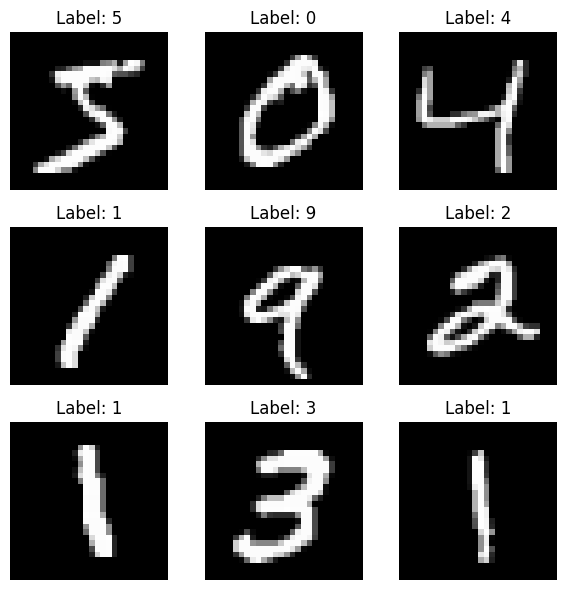

In [ ]:
import matplotlib.pyplot as plt

# Show first 9 images from training data
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()